# MOwNiT – znajdowanie miejsc zerowych funkcji nieliniowych metodą siecznych i metodą Newtona

__Przygotował:__
__Szymon Budziak__

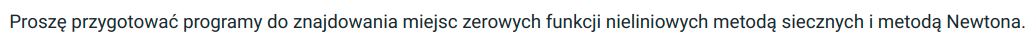

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = "{:,.12f}".format

## Exercise 1

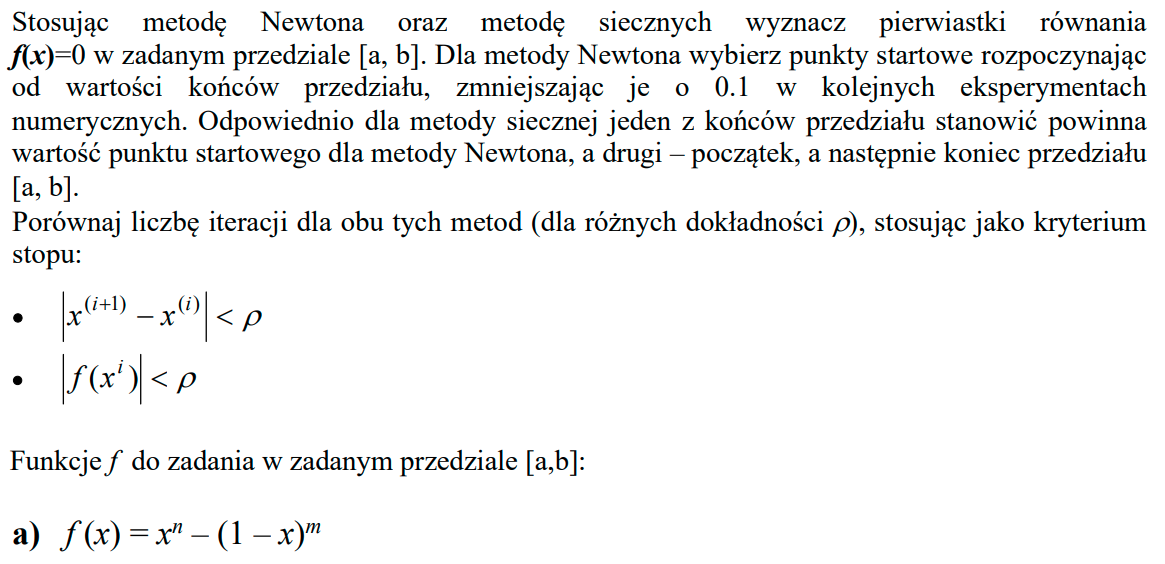

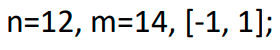

In [2]:
def func1(x):
    n = 12
    m = 14
    y = x**n - (1-x)**m
    return y

In [3]:
def der_func1(x):
    n = 12
    m = 14
    deriv = n*x**(n-1) + m*(1-x)**(m-1)
    return deriv

**Plot of the function**

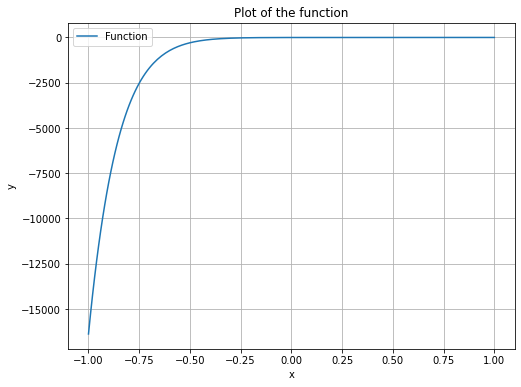

In [4]:
plt.figure(figsize=(8,6))
X = np.arange(-1, 1+0.01, 0.01)
plt.plot(X, func1(X), label = "Function")
plt.title(f"Plot of the function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

### Finding roots with Newton's method

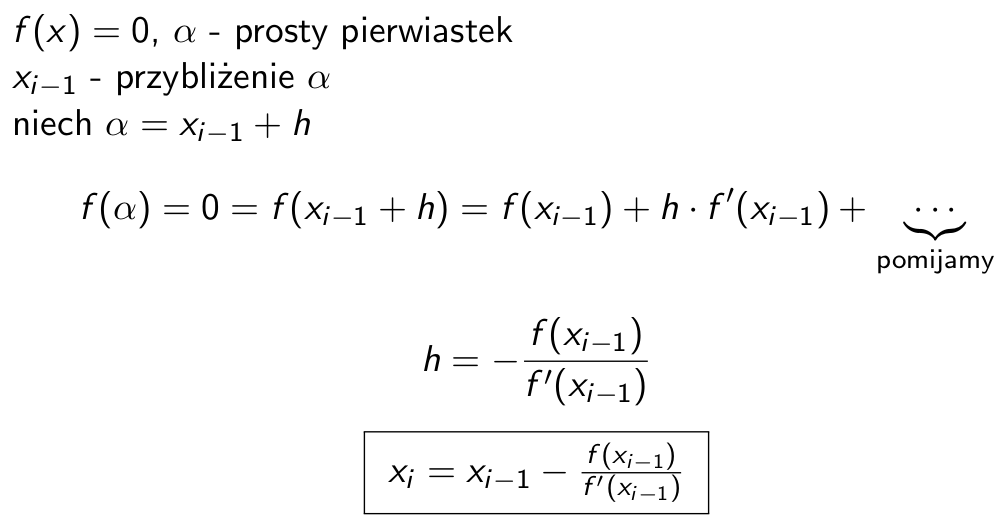

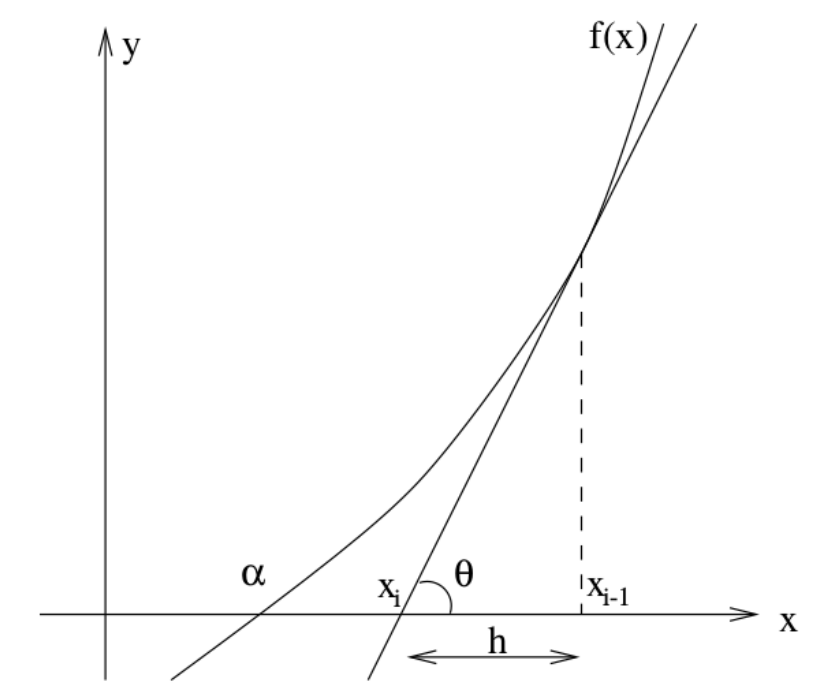

In [5]:
def newtons_method(func, der, x_0, epsilon, max_iter, stop_condition):
    x_n = x_0
    for n in range(max_iter):
        f_xn = func(x_n)
        der_fxn = der(x_n)
        if der_fxn == 0:
            # Zero derivative. No solution found.
            return None, None
        if stop_condition == "abs" and abs(f_xn) < epsilon:
            # Found solution
            return x_n, n
        elif stop_condition == "points" and abs(f_xn / der_fxn) < epsilon:
            # Found solution
            return x_n, n
        x_n -= f_xn / der_fxn
    # Exceeded maximum number of iterations. No solution found.
    return None, np.inf

### Finding roots with secant method

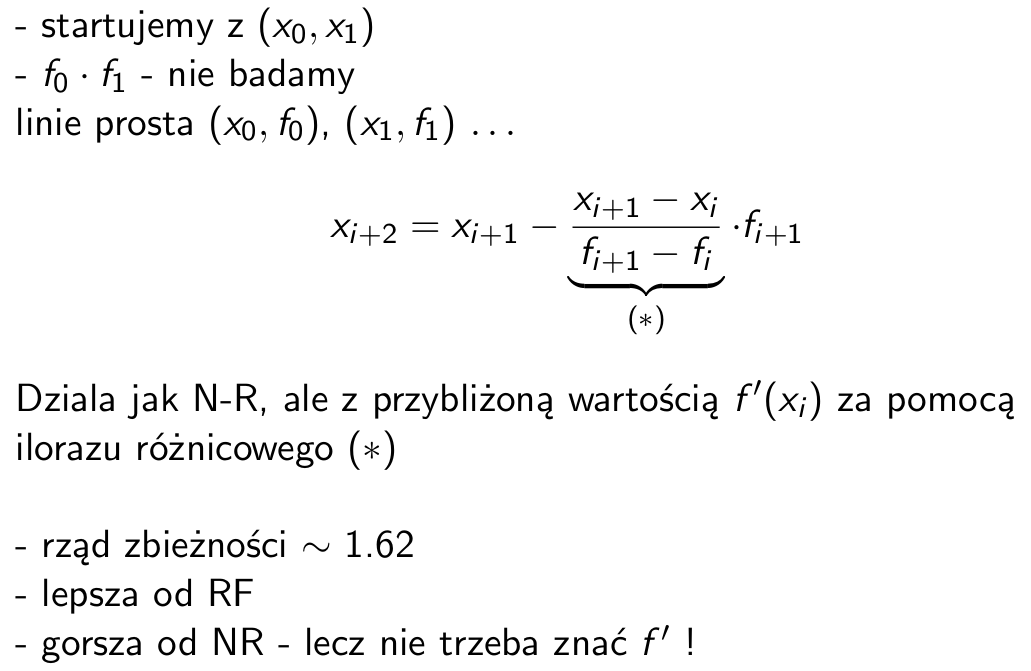

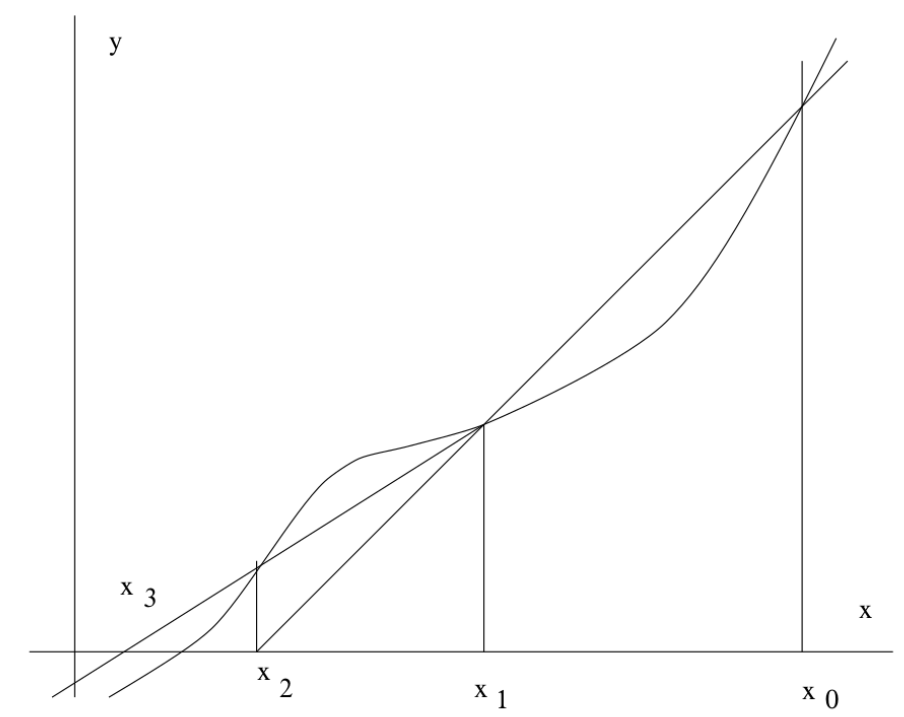

In [6]:
def secant(func, x_1, x_2, epsilon, max_iter, stop_condition):
    for n in range(max_iter):
        if func(x_1) == func(x_2):
            # Divided by zero
            return None, None
        x_1, x_2 = x_2, x_2 - (x_2 - x_1) * func(x_2) / (func(x_2) - func(x_1))
        if stop_condition == "abs" and abs(func(x_2)) < epsilon:
            # Found solution
            return x_2, n
        elif stop_condition == "points" and abs(x_1 - x_2) < epsilon:
            # Found solution
            return x_2, n
    # Exceeded maximum number of iterations. No solution found.
    return None, np.inf

In [7]:
def create_dataframe(method_name, epsilon, max_iter, stop_condition):
    X = np.arange(-1, 1 + 0.1, 0.1)
    result = []
    for x_0 in X:
        if method_name == "newton":
            x, n = newtons_method(func1, der_func1, x_0, np.e**(-20), max_iter, stop_condition)
            result += [x, n]
        elif method_name == "secant":
                x, n = secant(func1, x_0, 1, np.e**(-20), 100, "points")
                result += [x, n]
                x, n = secant(func1, -1, x_0, np.e**(-20), 100, "points")
                result += [x, n]
    df = pd.DataFrame(data={"x value": result[::2],
                            "num of iterations": result[1::2]})
    return df

**Newton's method**

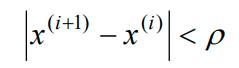

In [8]:
create_dataframe("newton", np.e**(-20), 100, "points")

,x value,num of iterations
0,0.473311013299,21
1,0.473311013299,20
2,0.473311013206,19
3,0.473311013299,19
4,0.473311013299,18
5,0.473311013299,17
6,0.473311013299,16
7,0.473311013299,15
8,0.473311013299,14
9,0.473311013299,13


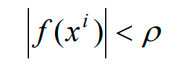

In [9]:
create_dataframe("newton", np.e**(-20), 100, "abs")

,x value,num of iterations
0,0.473310976288,20
1,0.473311013299,20
2,0.473311013206,19
3,0.473311010290,18
4,0.473310980906,17
5,0.473310867801,16
6,0.473310705697,15
7,0.473310705696,14
8,0.473310884677,13
9,0.473310997174,12


**secant method**

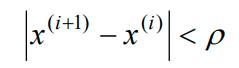

In [10]:
create_dataframe("secant", np.e**(-20), 100, "points")

,x value,num of iterations
0,0.473311013299,17.000000000000
1,NaN,NaN
2,0.473311013299,17.000000000000
3,0.473311013299,29.000000000000
4,0.473311013299,17.000000000000
5,0.473311013299,28.000000000000
6,0.473311013299,17.000000000000
7,0.473311013299,27.000000000000
8,0.473311013299,17.000000000000
9,0.473311013299,26.000000000000


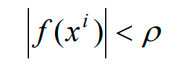

In [11]:
create_dataframe("secant", np.e**(-20), 100, "abs")

,x value,num of iterations
0,0.473311013299,17.000000000000
1,NaN,NaN
2,0.473311013299,17.000000000000
3,0.473311013299,29.000000000000
4,0.473311013299,17.000000000000
5,0.473311013299,28.000000000000
6,0.473311013299,17.000000000000
7,0.473311013299,27.000000000000
8,0.473311013299,17.000000000000
9,0.473311013299,26.000000000000


## Exercise 2

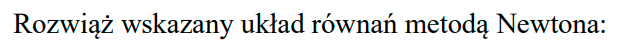

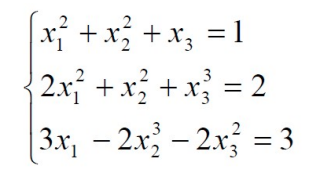

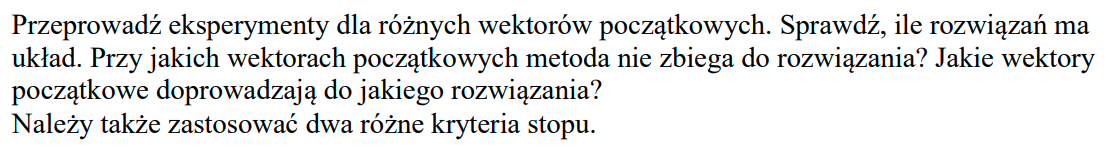

In [12]:
def func2(X):
    result = np.zeros(3)
    result[0] = X[0] ** 2 + X[1] ** 2 + X[2]
    result[1] = 2 * X[0] ** 2 + X[1] ** 2 + X[2] ** 3
    result[2] = 3 * X[0] - 2 * X[1] ** 3 - 2 * X[2] ** 2
    return result


def jacobian(X):
    result = [[2 * X[0], 2 * X[1], 1],
              [4 * X[0], 2 * X[1], 3 * X[2] ** 2],
              [3, -6 * X[1] ** 2, -4 * X[2]]]
    return result

In [13]:
def newton_matrix(func, jacob, ends, epsilon, stop_condition):
    X = np.array(ends)
    max_iter = 0
    for i in range(500):
        X_copy = np.copy(X)
        try:
            S = np.linalg.solve(jacob(X), func(X))
        except np.linalg.LinAlgError:
            return None, None
        X = X - S
        max_iter += 1
        if stop_condition == "diff" and np.linalg.norm(X - X_copy) < epsilon:
            return X, max_iter
        elif stop_condition == "func" and np.linalg.norm(func(X)) < epsilon:
            return X, max_iter
    return None, None

In [14]:
def newton(stop_condition):
    vectors = [-1, -0.6, -0.2, 0.2, 0.6, 1]
    epsilon = [0.0001, 0.00001, 0.000001]
    result = []
    for end_1 in vectors:
        for end_2 in vectors:
            for end_3 in vectors:
                for e in epsilon:
                    x, max_iter = newton_matrix(func2, jacobian, [end_1, end_2, end_3], e, stop_condition)
                    result += [end_1, end_2, end_3, e, max_iter]
    df = pd.DataFrame(data={"end 1": result[::5],
                            "end 2": result[1::5],
                            "end 3": result[2::5],
                            "epsilon": result[3::5],
                            "num of iterations": result[4::5]})
    return df

In [15]:
newton("diff")

,end 1,end 2,end 3,epsilon,num of iterations
0,-1.000000000000,-1.000000000000,-1.000000000000,0.000100000000,5
1,-1.000000000000,-1.000000000000,-1.000000000000,0.000010000000,6
2,-1.000000000000,-1.000000000000,-1.000000000000,0.000001000000,6
3,-1.000000000000,-1.000000000000,-0.600000000000,0.000100000000,9
4,-1.000000000000,-1.000000000000,-0.600000000000,0.000010000000,10
...,...,...,...,...,...
643,1.000000000000,1.000000000000,0.600000000000,0.000010000000,13
644,1.000000000000,1.000000000000,0.600000000000,0.000001000000,13
645,1.000000000000,1.000000000000,1.000000000000,0.000100000000,206
646,1.000000000000,1.000000000000,1.000000000000,0.000010000000,206


In [16]:
newton("func")

,end 1,end 2,end 3,epsilon,num of iterations
0,-1.000000000000,-1.000000000000,-1.000000000000,0.000100000000,4
1,-1.000000000000,-1.000000000000,-1.000000000000,0.000010000000,5
2,-1.000000000000,-1.000000000000,-1.000000000000,0.000001000000,5
3,-1.000000000000,-1.000000000000,-0.600000000000,0.000100000000,8
4,-1.000000000000,-1.000000000000,-0.600000000000,0.000010000000,9
...,...,...,...,...,...
643,1.000000000000,1.000000000000,0.600000000000,0.000010000000,12
644,1.000000000000,1.000000000000,0.600000000000,0.000001000000,13
645,1.000000000000,1.000000000000,1.000000000000,0.000100000000,205
646,1.000000000000,1.000000000000,1.000000000000,0.000010000000,205
